In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings 
warnings.filterwarnings("ignore") 

# Loading Data

In [63]:
# Reload the data with the correct delimiter and handling of quotes
df = pd.read_csv("bank-full.csv", delimiter=';', quotechar='"')

# Check the first few rows to confirm it loads into the expected 17 columns
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Data Structure

In [87]:
#Datatypes
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [88]:
df.shape

(45211, 17)

In [75]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [89]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,1.197347,no,no,cellular,17,nov,6.886532,0.869742,0.423036,0.423036,unknown,yes
45207,71,retired,divorced,primary,no,1.200241,no,no,cellular,17,nov,6.126869,0.741276,0.423036,0.423036,unknown,yes
45208,72,retired,married,secondary,no,1.210159,no,no,cellular,17,nov,7.029088,1.026672,1.040119,0.672503,success,yes
45209,57,blue-collar,married,secondary,no,1.196810,no,no,telephone,17,nov,6.234411,0.959135,0.423036,0.423036,unknown,no
45210,37,entrepreneur,married,secondary,no,1.203759,no,no,cellular,17,nov,5.894403,0.741276,1.041317,0.820286,other,no


In [67]:
#Check for duplicates
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [86]:
#Check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## There are no null values, however there are columns that have values labeled 'Unknown'. 

In [90]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

# Solution:

In [91]:
# Change categorical to numerical values by encoding 
df['y']= df['y'].map({'yes':1, 'no':0})

In [92]:
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [26]:
# Count the values in the last column
value_counts = df.iloc[:, -1].value_counts()

# Calculate percentages
total = value_counts.sum()
percentages = (value_counts / total) * 100

print("\nPercentages:")
for value, count in value_counts.items():
    percentage = percentages[value]
    print(f"{value}: {count} ({percentage:.2f}%)")


Percentages:
no: 39922 (88.30%)
yes: 5289 (11.70%)


### Distribution is heavily skewed.

# Solution:

In [74]:
#balance the data
def balance_csv(input_file, output_file, sample_size=None):
    # Read the CSV file
    df = pd.read_csv(input_file, sep=';')

    # Get the target column (last column)
    target_col = df.columns[-1]

    # Group by the target column
    grouped = df.groupby(target_col, group_keys=False)  # Exclude grouping keys from being added to the output

    # Determine the sample size for each group
    if sample_size is None:
        sample_size = grouped.size().min()
    else:
        sample_size = min(sample_size // 2, grouped.size().min())

    # Take a random sample from each group
    sampled = grouped.apply(lambda x: x.sample(n=sample_size, random_state=42))

    # Shuffle the DataFrame to mix 'yes' and 'no' rows
    df_balanced = sampled.sample(frac=1, random_state=42).reset_index(drop=True)

    # Write to output file
    df_balanced.to_csv(output_file, sep=';', index=False)

    # Print statistics
    value_counts = df_balanced[target_col].value_counts()
    print(f"Output file created: {output_file}")
    print(f"Yes count: {value_counts.get('yes', 0)}")
    print(f"No count: {value_counts.get('no', 0)}")

# Usage
balance_csv('bank-full.csv', 'bank_balanced.csv')

Output file created: bank_balanced.csv
Yes count: 5289
No count: 5289



Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 4729
Percentage of outliers: 10.46%

Outliers in column 'duration':
Number of outliers: 3235
Percentage of outliers: 7.16%

Outliers in column 'campaign':
Number of outliers: 3064
Percentage of outliers: 6.78%

Outliers in column 'pdays':
Number of outliers: 8257
Percentage of outliers: 18.26%

Outliers in column 'previous':
Number of outliers: 8257
Percentage of outliers: 18.26%


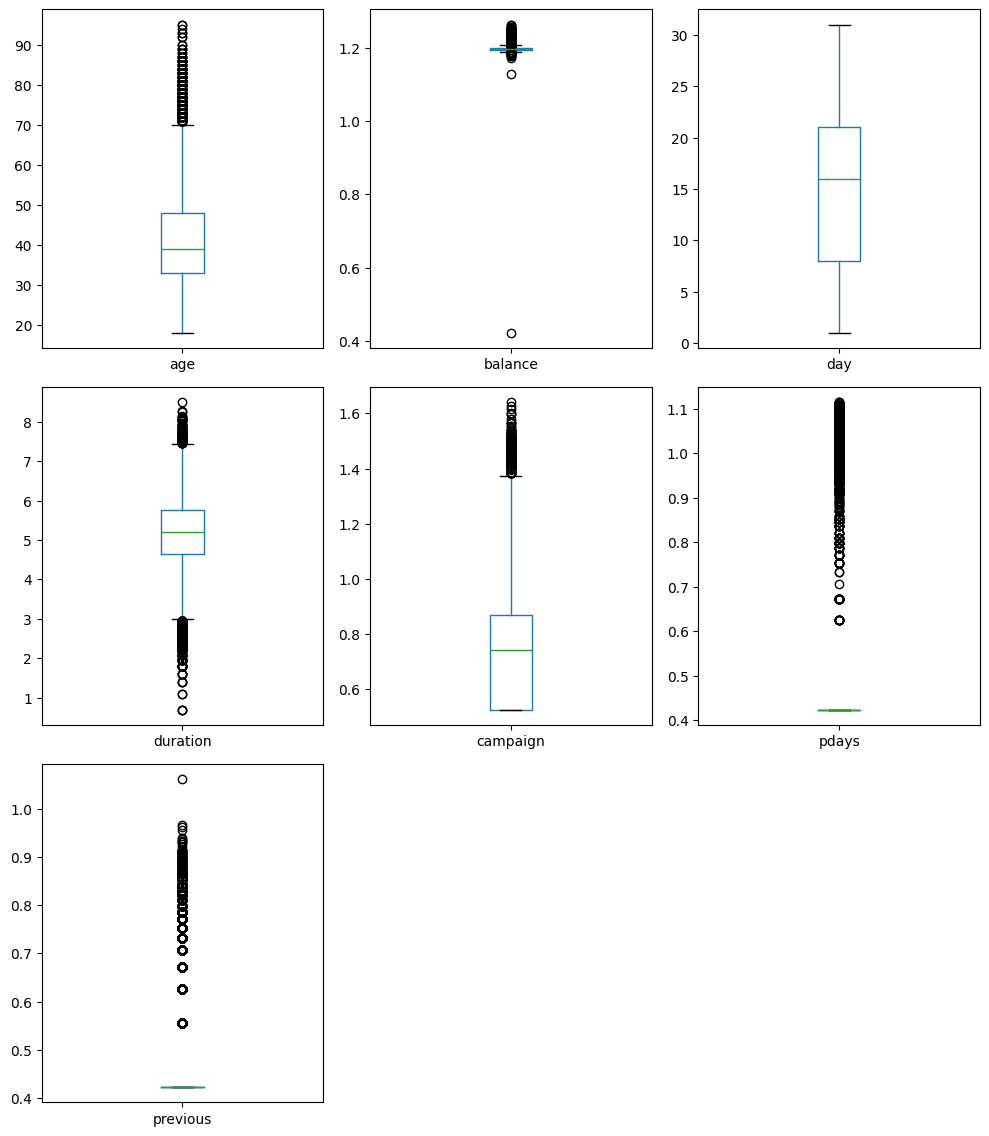

In [93]:
#Check for outliers 

cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()


def check_outliers(df, delimiter=';'):
    df = pd.read_csv('bank-full.csv', delimiter=delimiter)

    def find_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df.select_dtypes(include=[np.number]).columns:
        outliers = find_outliers(df[column])
        if not outliers.empty:
            print(f"\nOutliers in column '{column}':")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers) / len(df[column])) * 100:.2f}%")

check_outliers('bank-full.csv')


# Solution:

In [94]:
#Impute the mean to diminish outliers
def impute_outliers(df):
    for column in ["balance","campaign", "duration", "pdays", "previous"]:
        if column == "pdays":
            valid_data = df[df[column] != -1][column]
        elif column == "previous":
            valid_data = df[df[column] != 0][column]
        else:
            valid_data = df[column]

        mean = valid_data.mean()
        std = valid_data.std()
        lower_limit = mean - std
        upper_limit = mean + std

        # Only impute values that are not -1 for pdays or 0 for previous
        if column == "pdays":
            df.loc[(df[column] < lower_limit) & (df[column] != -1), column] = mean
            df.loc[(df[column] > upper_limit) & (df[column] != -1), column] = mean
        elif column == "previous":
            df.loc[(df[column] < lower_limit) & (df[column] != 0), column] = mean
            df.loc[(df[column] > upper_limit) & (df[column] != 0), column] = mean
        else:
            df.loc[df[column] < lower_limit, column] = mean
            df.loc[df[column] > upper_limit, column] = mean

    return df

# Impute outliers
df_imputed = impute_outliers(df)

def check_outliers(df):
    def find_outliers(series, ignore_value=None):
        if ignore_value is not None:
            series = series[series != ignore_value]
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df.select_dtypes(include=[np.number]).columns:
        if column == "pdays":
            outliers = find_outliers(df[column], ignore_value=-1)
        elif column == "previous":
            outliers = find_outliers(df[column], ignore_value=0)
        else:
            outliers = find_outliers(df[column])

        print(f"\nOutliers in column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers) / len(df[column])) * 100:.2f}%")

df = pd.read_csv('bank-full.csv', delimiter=';')

print("Check outliers for original df & imputed df: ")
check_outliers(df)
print('-------------------------')
check_outliers(df_imputed)

Check outliers for original df & imputed df: 

Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 4729
Percentage of outliers: 10.46%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 3235
Percentage of outliers: 7.16%

Outliers in column 'campaign':
Number of outliers: 3064
Percentage of outliers: 6.78%

Outliers in column 'pdays':
Number of outliers: 49
Percentage of outliers: 0.11%

Outliers in column 'previous':
Number of outliers: 453
Percentage of outliers: 1.00%
-------------------------

Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 1381
Percentage of outliers: 3.05%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers

In [83]:
#Skewness in numerical columns

def check_skewness(df, printing=True):
    highly_skewed_columns = []
    def interpret_skewness(sk):
        if sk < -1:
            return "Highly Negatively Skewed"
        elif -1 <= sk < -0.5:
            return "Moderately Negatively Skewed"
        elif -0.5 <= sk < 0:
            return "Approximately Symmetric (Slightly Negative)"
        elif sk == 0:
            return "Perfectly Symmetric"
        elif 0 < sk < 0.5:
            return "Approximately Symmetric (Slightly Positive)"
        elif 0.5 <= sk < 1:
            return "Moderately Positively Skewed"
        else:
            return "Highly Positively Skewed"

# Check each numeric column for skewness
    for column in df.select_dtypes(include=[np.number]).columns:
        sk = skew(df[column].dropna())
        interpretation = interpret_skewness(sk)
        if printing:
            print(f"\nColumn: {column}")
            print(f"Skewness: {sk:.4f}")
            print(f"Interpretation: {interpretation}")
        if abs(sk) > 1:
            highly_skewed_columns.append(column)

    return highly_skewed_columns

# Usage
df = pd.read_csv('bank-full.csv', delimiter=';')
check_skewness(df)


Column: age
Skewness: 0.6848
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: 8.3600
Interpretation: Highly Positively Skewed

Column: day
Skewness: 0.0931
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: 3.1442
Interpretation: Highly Positively Skewed

Column: campaign
Skewness: 4.8985
Interpretation: Highly Positively Skewed

Column: pdays
Skewness: 2.6156
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 41.8451
Interpretation: Highly Positively Skewed


['balance', 'duration', 'campaign', 'pdays', 'previous']

# Solution: Replacing values w/ log transformation to preserve data

In [95]:
def apply_log_transformations(df, log_columns):
    df_transformed = df.copy()

    for col in log_columns:
        if col in df_transformed.columns:
            min_value = df_transformed[col].min()
            if min_value <= 0:
                df_transformed[col] = df_transformed[col] - min_value + 1
            df_transformed[col] = np.log1p(df_transformed[col])

    return df_transformed
    
df = pd.read_csv('bank-full.csv', delimiter=';')
log_columns = check_skewness(df, printing=False)
prev_len = 0
while len(log_columns) != prev_len:
    prev_len = len(log_columns)
    df = apply_log_transformations(df, check_skewness(df, printing=False))
    log_columns = check_skewness(df, printing=False)
check_skewness(df)


Column: age
Skewness: 0.6848
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: -28.1249
Interpretation: Highly Negatively Skewed

Column: day
Skewness: 0.0931
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: -0.4055
Interpretation: Approximately Symmetric (Slightly Negative)

Column: campaign
Skewness: 0.7709
Interpretation: Moderately Positively Skewed

Column: pdays
Skewness: 1.6679
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 2.2532
Interpretation: Highly Positively Skewed


['balance', 'pdays', 'previous']